# Feature selection Socio-Economical Data Final: World Bank Indicators

Fabiana Castiblanco 

**GitHub**: fabi-cast

After analyzing the correlations between some of the indicators, we have decided drop many of them keeping the most relevants.

In [1]:
import pandas as pd
import numpy as np
import re
import math
import requests
import json
import matplotlib
from pandas import ExcelFile
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
plt.rcParams["figure.figsize"]= (8,5)

In [2]:
#loading the dataset
#df = pd.read_csv("Data_input/WBI.csv", sep = ";")
df = pd.read_csv("Data_input/OUTPUT_WBI_Selection_Country_Year.csv", sep = ";")
#this function creates a dataset for each country in the desired format
def get_WBI(isocode):
    indicators = list(df[df["Country Code"] == isocode].drop(columns = ["Country Name"]).T.iloc[1])
    cols = list(df[df["Country Code"] == isocode].drop(columns = ["Country Name"]).T.columns)
    dict_cols = {cols[i]: indicators[i] for i in range(len(cols))}
    data = (df[df["Country Code"] == isocode].drop(columns = ["Country Name"])
                                           .T.rename(columns = dict_cols)
                                           .drop(labels=["Country Code", "Series Name", "Income_level", "Indicator_CAT"], axis =0))
    data = data.reset_index().rename(columns = {"index": "Year"})
    data["ISO3"] = isocode
    return data

In [3]:
# this give us indicators and category of them
def get_WBI_cat(isocode, category):
    indicators = list(df[df["Country Code"] == isocode].drop(columns = ["Country Name"]).T.iloc[1])
    cols = list(df[df["Country Code"] == isocode].drop(columns = ["Country Name"]).T.columns)
    dict_cols = {cols[i]: indicators[i] for i in range(len(cols))}
    data = df[df["Indicator_CAT"] == category]
    data = (df[df["Country Code"] == isocode].drop(columns = ["Country Name"])
                                           .T.rename(columns = dict_cols)
                                           .drop(labels=["Country Code", "Series Name", "Income_level", "Indicator_CAT"], axis =0))
    data = data.reset_index().rename(columns = {"index": "Year"})
    data["ISO3"] = isocode
    return data

In [4]:
df.head(2)

,Country Name,Country Code,Series Name,1949,1950,1951,1952,1953,1954,1955,...,2012,2013,2014,2015,2016,2017,2018,2019,Income_level,Indicator_CAT
0,Aruba,ABW,Adjusted savings: education expenditure (% of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.863412,7.271645,6.411805,6.793939,6.793939,6.793939,NaN,NaN,High,NaN
1,Aruba,ABW,"Air transport, freight (million ton-km)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High,NaN


In [5]:
codes = list(df["Country Code"].value_counts().index)
codes.sort()


In [6]:
#running the function for each country and store it as a list of datasets
all_countries = [get_WBI(iso) for iso in codes]

#concat all the datasets
ds = pd.concat(all_countries)

In [7]:
ds.head(2)

,Year,Adjusted savings: education expenditure (% of GNI),"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),...,"Net official flows from UN agencies, UNICEF (current US$)","Net official flows from UN agencies, UNPBF (current US$)","Net official flows from UN agencies, UNRWA (current US$)","Net official flows from UN agencies, UNTA (current US$)","Net official flows from UN agencies, UNWTO (current US$)","Net official flows from UN agencies, WFP (current US$)","Net official flows from UN agencies, WHO (current US$)",Population density (people per sq. km of land area),Rural population (% of total population),ISO3
0,1949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABW
1,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABW


We want to have the name and code for each country as well, so we subset the original data set for obtaining this data:

In [8]:
countries_codes = df[["Country Name", "Country Code"]].copy()
countries_codes.drop_duplicates(keep="first",inplace=True) 

Lastly we merge both datasets and drop duplicated columns:

In [9]:
ds_new = countries_codes.merge(ds, left_on = "Country Code", right_on = "ISO3", how = "right").drop(columns = "ISO3")

In [10]:
ds_new.head()

,Country Name,Country Code,Year,Adjusted savings: education expenditure (% of GNI),"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),...,"Net official flows from UN agencies, UNHCR (current US$)","Net official flows from UN agencies, UNICEF (current US$)","Net official flows from UN agencies, UNPBF (current US$)","Net official flows from UN agencies, UNRWA (current US$)","Net official flows from UN agencies, UNTA (current US$)","Net official flows from UN agencies, UNWTO (current US$)","Net official flows from UN agencies, WFP (current US$)","Net official flows from UN agencies, WHO (current US$)",Population density (people per sq. km of land area),Rural population (% of total population)
0,Aruba,ABW,1949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aruba,ABW,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aruba,ABW,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,ABW,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
ds_new.columns

Index(['Country Name', 'Country Code', 'Year',
       'Adjusted savings: education expenditure (% of GNI)',
       'Air transport, freight (million ton-km)',
       'Arable land (hectares per person)', 'Cereal yield (kg per hectare)',
       'Food production index (2004-2006 = 100)', 'GDP growth (annual %)',
       'GDP per capita (constant 2010 US$)',
       'Life expectancy at birth, total (years)',
       'Mobile cellular subscriptions (per 100 people)',
       'Net official flows from UN agencies, FAO (current US$)',
       'Net official flows from UN agencies, IAEA (current US$)',
       'Net official flows from UN agencies, IFAD (current US$)',
       'Net official flows from UN agencies, ILO (current US$)',
       'Net official flows from UN agencies, UNAIDS (current US$)',
       'Net official flows from UN agencies, UNDP (current US$)',
       'Net official flows from UN agencies, UNECE (current US$)',
       'Net official flows from UN agencies, UNEP (current US$)',
       'N

In [12]:
ds_new.dtypes

Country Name                                                 object
Country Code                                                 object
Year                                                         object
Adjusted savings: education expenditure (% of GNI)           object
Air transport, freight (million ton-km)                      object
Arable land (hectares per person)                            object
Cereal yield (kg per hectare)                                object
Food production index (2004-2006 = 100)                      object
GDP growth (annual %)                                        object
GDP per capita (constant 2010 US$)                           object
Life expectancy at birth, total (years)                      object
Mobile cellular subscriptions (per 100 people)               object
Net official flows from UN agencies, FAO (current US$)       object
Net official flows from UN agencies, IAEA (current US$)      object
Net official flows from UN agencies, IFAD (curre

In [13]:
#Infering the data type of each column
ds_new = ds_new.infer_objects()

# Setting Year as integer variable
ds_new["Year"] = ds_new.Year.astype(int)

In [14]:
ds_new.dtypes

Country Name                                                  object
Country Code                                                  object
Year                                                           int32
Adjusted savings: education expenditure (% of GNI)           float64
Air transport, freight (million ton-km)                      float64
Arable land (hectares per person)                            float64
Cereal yield (kg per hectare)                                float64
Food production index (2004-2006 = 100)                      float64
GDP growth (annual %)                                        float64
GDP per capita (constant 2010 US$)                           float64
Life expectancy at birth, total (years)                      float64
Mobile cellular subscriptions (per 100 people)               float64
Net official flows from UN agencies, FAO (current US$)       float64
Net official flows from UN agencies, IAEA (current US$)      float64
Net official flows from UN agencie

## Creating new feature about UN flows

As we see above, many features contain information about Net flows comming from agencies from UN. As we don't need information too granular, we will add all of them:

In [15]:
#catgories and indicators
categories = df[["Series Name", "Indicator_CAT"]].drop_duplicates().rename(columns = {"Series Name":"indicator"})

#Features which include flows from UN
flow_cols = list(categories[categories.indicator.str.contains("UN")].indicator)
flow_cols

['Net official flows from UN agencies, FAO (current US$)',
 'Net official flows from UN agencies, IAEA (current US$)',
 'Net official flows from UN agencies, IFAD (current US$)',
 'Net official flows from UN agencies, ILO (current US$)',
 'Net official flows from UN agencies, UNAIDS (current US$)',
 'Net official flows from UN agencies, UNDP (current US$)',
 'Net official flows from UN agencies, UNECE (current US$)',
 'Net official flows from UN agencies, UNEP (current US$)',
 'Net official flows from UN agencies, UNFPA (current US$)',
 'Net official flows from UN agencies, UNHCR (current US$)',
 'Net official flows from UN agencies, UNICEF (current US$)',
 'Net official flows from UN agencies, UNPBF (current US$)',
 'Net official flows from UN agencies, UNRWA (current US$)',
 'Net official flows from UN agencies, UNTA (current US$)',
 'Net official flows from UN agencies, UNWTO (current US$)',
 'Net official flows from UN agencies, WFP (current US$)',
 'Net official flows from UN agen

Now we will sum-up all the columns in the list ``flow_cols``:

In [16]:
ds_new["Net flows from UN agencies US$"] = ds_new[flow_cols].sum(axis=1)

In [17]:
ds_new.columns

Index(['Country Name', 'Country Code', 'Year',
       'Adjusted savings: education expenditure (% of GNI)',
       'Air transport, freight (million ton-km)',
       'Arable land (hectares per person)', 'Cereal yield (kg per hectare)',
       'Food production index (2004-2006 = 100)', 'GDP growth (annual %)',
       'GDP per capita (constant 2010 US$)',
       'Life expectancy at birth, total (years)',
       'Mobile cellular subscriptions (per 100 people)',
       'Net official flows from UN agencies, FAO (current US$)',
       'Net official flows from UN agencies, IAEA (current US$)',
       'Net official flows from UN agencies, IFAD (current US$)',
       'Net official flows from UN agencies, ILO (current US$)',
       'Net official flows from UN agencies, UNAIDS (current US$)',
       'Net official flows from UN agencies, UNDP (current US$)',
       'Net official flows from UN agencies, UNECE (current US$)',
       'Net official flows from UN agencies, UNEP (current US$)',
       'N

Now we will drop the columns in ``flow_cols`` which we won't use further:

In [18]:
ds_new.drop(columns = flow_cols, inplace= True)

In [19]:
ds_new.columns

Index(['Country Name', 'Country Code', 'Year',
       'Adjusted savings: education expenditure (% of GNI)',
       'Air transport, freight (million ton-km)',
       'Arable land (hectares per person)', 'Cereal yield (kg per hectare)',
       'Food production index (2004-2006 = 100)', 'GDP growth (annual %)',
       'GDP per capita (constant 2010 US$)',
       'Life expectancy at birth, total (years)',
       'Mobile cellular subscriptions (per 100 people)',
       'Population density (people per sq. km of land area)',
       'Rural population (% of total population)',
       'Net flows from UN agencies US$'],
      dtype='object')

In [20]:
ds_new.shape

(15691, 15)

Rearranging the columns:

In [21]:
ds_new = ds_new[['Country Name', 'Country Code', 'Year',
       'Air transport, freight (million ton-km)',
       'Arable land (hectares per person)', 'Cereal yield (kg per hectare)',
       'Food production index (2004-2006 = 100)', 'GDP growth (annual %)',
       'GDP per capita (constant 2010 US$)',
       'Net flows from UN agencies US$',
       'Life expectancy at birth, total (years)',
       'Mobile cellular subscriptions (per 100 people)',
       'Population density (people per sq. km of land area)',
       'Adjusted savings: education expenditure (% of GNI)',
       'Rural population (% of total population)'
       ]]

In [22]:
ds_new.head()

,Country Name,Country Code,Year,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population)
0,Aruba,ABW,1949,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,Aruba,ABW,1950,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,Aruba,ABW,1951,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,1952,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,Aruba,ABW,1953,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [23]:
#converting all country codes to upper caps
ds_new["Country Code"] = ds_new["Country Code"].apply(lambda x: x.upper())

# Finding NaN values

First we will explore how many of our features have null values:

In [24]:
def null_cols(data):

    """
    This function takes a dataframe df and shows the columns of df that have NaN values
    and the number of them

    """
    nulls = data.isna().sum()
    nulls = nulls[nulls > 0] / len(data) * 100
    nulls = pd.DataFrame(nulls.sort_values(ascending = False))
    nulls = nulls.reset_index().rename(columns = {"index": "Feature", 0: "% Null rows"})
    return nulls

In [25]:
null_cols(ds_new)

,Feature,% Null rows
0,"Air transport, freight (million ton-km)",55.662482
1,Cereal yield (kg per hectare),40.175897
2,GDP per capita (constant 2010 US$),39.468485
3,GDP growth (annual %),39.302785
4,Adjusted savings: education expenditure (% of ...,38.831177
5,Mobile cellular subscriptions (per 100 people),38.722835
6,Food production index (2004-2006 = 100),32.776751
7,Arable land (hectares per person),31.846281
8,"Life expectancy at birth, total (years)",26.320821
9,Population density (people per sq. km of land ...,21.012045


In [26]:
df_null_cols = null_cols(ds_new)

In [27]:
df_null_cols.to_csv(r'C:/Users/torre/Documents/Local Omdena WFP files/WorldBank/Part1/df_null_cols.csv', index = False, sep = ';')

In [28]:
countries_missing = pd.DataFrame(ds_new[ds_new["Air transport, freight (million ton-km)"].isna()]["Country Code"].value_counts())

In [29]:
countries_missing= countries_missing.reset_index()

In [30]:
countries_missing.rename(columns={"index": "ISO", "Country Code": "missing_rows"})

,ISO,missing_rows
0,VCT,71
1,PYF,71
2,IMN,71
3,LIE,71
4,ERI,71
...,...,...
216,SYR,22
217,FIN,22
218,EGY,22
219,LAO,22


# Correlations between the features

Here we should isolate the non numerical features from the rest. We first should check the data types of the data set:

In [31]:
#Selecting the numerical features

numerical_features = list(ds_new.select_dtypes(include=['float64']).columns)

In [32]:
#New data sets to construct the correlation matrix
ds_num = ds_new[numerical_features]

In [33]:
#correlation matrices
corr_num = ds_num.corr(method = "spearman")

(12.5, -0.5)

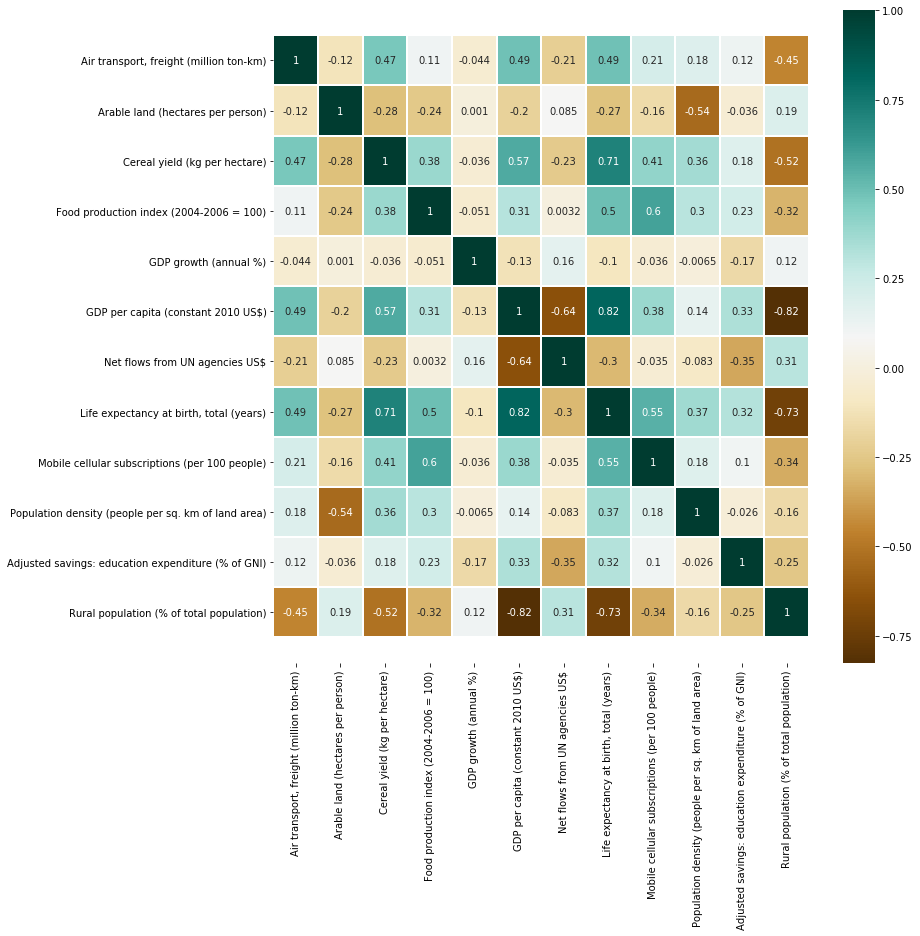

In [34]:
fig, ax = plt.subplots(figsize=(12,12))
ax = plt.subplot(111)
sns.heatmap(corr_num, annot=True, linewidth=1, cmap="BrBG", ax=ax)
bottom, top = ax.get_ylim()             # this fixes a bug where first and last columns were not visualized correctly
ax.set_ylim(bottom + 0.5, top - 0.5)

In [35]:
# Writing to csv the datase

corr_num.to_csv(r'C:/Users/torre/Documents/Local Omdena WFP files/WorldBank/Part1/corr_num.csv', index = True, sep = ';')

## Filling NaNs by using rolling average for each feature

Moving average can be used as a data preparation technique to create a smoothed version of the original dataset.

Smoothing is useful as a data preparation technique as it can reduce the random variation in the observations and better expose the structure of the underlying causal processes.

The rolling() function on the Time Series Pandas object will automatically group observations into a window. You can specify the window size, and by default a trailing window is created. Once the window is created, we can take the mean value, and this is our transformed dataset.

rolling(4, min_periods = 1), which tells the function the minimum number of defined values within a window that have to be present to calculate a result.

**Idea Geetha:**

We start with this missing values:

In [36]:
null_cols(ds_new)

,Feature,% Null rows
0,"Air transport, freight (million ton-km)",55.662482
1,Cereal yield (kg per hectare),40.175897
2,GDP per capita (constant 2010 US$),39.468485
3,GDP growth (annual %),39.302785
4,Adjusted savings: education expenditure (% of ...,38.831177
5,Mobile cellular subscriptions (per 100 people),38.722835
6,Food production index (2004-2006 = 100),32.776751
7,Arable land (hectares per person),31.846281
8,"Life expectancy at birth, total (years)",26.320821
9,Population density (people per sq. km of land ...,21.012045


## Filling values for other features

First we will check which countries we have in the cyclones data set to restrict ourselves to them:

In [40]:
cy = pd.read_csv('Data_input/Master_1504.csv', sep=';', low_memory = False)

In [41]:
countries_cy = list(cy.ISO.value_counts().index)
countries_cy.sort()

In [42]:
countries_cy[0:10]

['AUS', 'BGD', 'BHS', 'BLZ', 'CAN', 'CHN', 'COL', 'COM', 'CRI', 'CUB']

Now we will create a new data set containing just data relevant to those countries:

In [43]:
ds_cy = ds_new[ds_new["Country Code"].isin(countries_cy)].copy()

In [44]:
ds_cy.head(2)

,Country Name,Country Code,Year,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population)
710,Australia,AUS,1949,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
711,Australia,AUS,1950,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


Checking for null values:

In [45]:
null_cols(ds_cy)

,Feature,% Null rows
0,"Air transport, freight (million ton-km)",48.826291
1,Adjusted savings: education expenditure (% of ...,35.613682
2,Mobile cellular subscriptions (per 100 people),35.278337
3,GDP per capita (constant 2010 US$),31.790744
4,GDP growth (annual %),31.522468
5,Cereal yield (kg per hectare),28.280796
6,Food production index (2004-2006 = 100),23.183546
7,Arable land (hectares per person),23.071764
8,"Life expectancy at birth, total (years)",20.880841
9,Population density (people per sq. km of land ...,18.309859


First we will make a list with the null features in this data set, and then we will iterate through each feature and country to fill the missing values.

In [46]:
features_nulls = list(null_cols(ds_cy).Feature)
features_nulls.sort()


In [47]:
features_nulls

['Adjusted savings: education expenditure (% of GNI)',
 'Air transport, freight (million ton-km)',
 'Arable land (hectares per person)',
 'Cereal yield (kg per hectare)',
 'Food production index (2004-2006 = 100)',
 'GDP growth (annual %)',
 'GDP per capita (constant 2010 US$)',
 'Life expectancy at birth, total (years)',
 'Mobile cellular subscriptions (per 100 people)',
 'Population density (people per sq. km of land area)',
 'Rural population (% of total population)']

In [48]:
countries_nulls = list(ds_cy[ds_cy[features_nulls[1]].isna()]["Country Code"].value_counts().index)

In [49]:
countries_nulls.sort()

## Example: Feature 1 and country 0

Let us begin with the first one and try the moving average algorithm here:

In [50]:
ds_opt = ds_cy[(ds_cy["Country Code"]== countries_nulls[0])][["Year", features_nulls[1]]].copy()

In [51]:
ds_opt.set_index("Year", inplace= True)

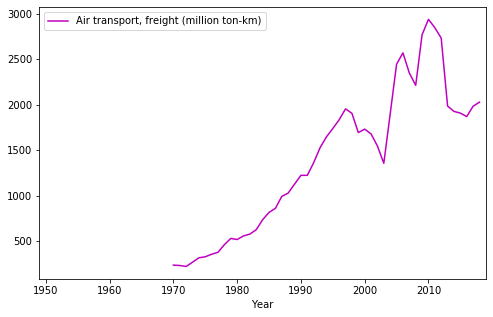

In [52]:
ds_opt.plot(c = "m");

In [53]:
test = ds_opt.fillna(ds_opt.rolling(6,min_periods=1,win_type='gaussian').mean(std=1)).copy()
test = test.fillna(method = 'bfill')
#dataframe_try3.tail(20)

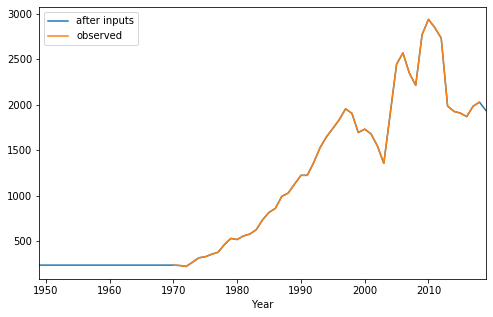

In [54]:
test.merge(ds_opt, on = "Year", how = "right").rename(columns= {features_nulls[1]+"_x": "after inputs", features_nulls[1]+"_y": "observed"}).plot();

Next country:

In [55]:
countries_nulls[1]

'BGD'

In [56]:
ds_opt = ds_cy[(ds_cy["Country Code"]== countries_nulls[1])][["Year", features_nulls[1]]].copy()
ds_opt.set_index("Year", inplace= True)


In [57]:
test = ds_opt.fillna(ds_opt.rolling(6,min_periods=1,win_type='gaussian').mean(std=1)).copy()
test = test.fillna(method = 'bfill')
#dataframe_try3.tail(20)

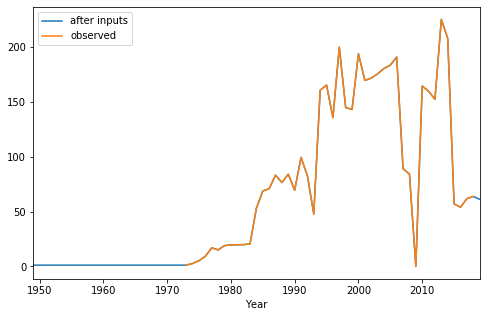

In [58]:
test.merge(ds_opt, on = "Year", how = "inner").rename(columns= {features_nulls[1]+"_y": "observed", features_nulls[1]+"_x": "after inputs"}).plot();

## Constructing a function doing everything at once:

We can construct then a function doing this for each country and feature:

In [59]:
#1. Obtain countries list with nulls in each feature
def get_countries_null(data,feature):
    
    count_nulls = list(data[data[feature].isna()]["Country Code"].value_counts().index)
    count_nulls.sort()
    return count_nulls
    

In [60]:
#2. isolate the column

def get_timeseries(data, feature, country):
    return data[(data["Country Code"]== country)][["Year", feature]].set_index("Year")

In [61]:
# get individual data set

def get_values(data, feature, country):
    datatest = get_timeseries(data, feature, country)
    datatest = datatest.fillna(datatest.rolling(6,min_periods=1,win_type='gaussian').mean(std=1))
    if (feature != 'Mobile cellular subscriptions (per 100 people)' and feature != 'GDP growth (annual %)'):
        datatest = datatest.fillna(method = 'bfill')
    datatest = datatest.fillna(method = 'ffill')
    datatest["Country Code"] = country
    return datatest

In [62]:
#put all together

def fill_values(data, feature):
    dfs = []
    null_countries = get_countries_null(data, feature)
    for country in countries_cy:
        if country in null_countries:
            dataset = get_values(data, feature, country)
        else:
            dataset = get_timeseries(data, feature, country)
            dataset["Country Code"] = country
        dfs.append(dataset)

    return pd.concat(dfs)
               

Let us test our main function ``fill_values`` with one feature and merge with the original dataset:

In [63]:
(fill_values(ds_cy,features_nulls[1]).reset_index()
                                  .merge(ds_cy, how = "inner", on = ["Year", "Country Code"]))

,Year,"Air transport, freight (million ton-km)_x",Country Code,Country Name,"Air transport, freight (million ton-km)_y",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population)
0,1949,234.699997,AUS,Australia,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
1,1950,234.699997,AUS,Australia,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
2,1951,234.699997,AUS,Australia,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
3,1952,234.699997,AUS,Australia,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
4,1953,234.699997,AUS,Australia,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4468,2015,0.796107,ZWE,Zimbabwe,0.796107,0.289548,558.2,83.42,1.779873,1234.103352,1.197046e+07,59.534,92.347105,35.710557,1.91,67.615
4469,2016,0.804947,ZWE,Zimbabwe,0.804947,0.285095,581.8,88.75,0.755869,1224.309922,4.008604e+07,60.294,91.793458,36.268295,1.91,67.704
4470,2017,0.665035,ZWE,Zimbabwe,0.665035,NaN,616.0,NaN,4.704035,1263.321322,2.992663e+07,60.812,98.985073,36.801719,1.91,67.763
4471,2018,0.665035,ZWE,Zimbabwe,0.665035,NaN,NaN,NaN,6.159190,1322.344063,2.163715e+07,NaN,89.404869,37.324591,NaN,67.791


In [64]:
ds_cy.shape

(4473, 15)

**It worked for one feature and all countries!** Lets iterate through features_nulls then. But first let us select the relevant features from the nulls, i.e. all of them except the first one:

In [65]:
 features_nulls

['Adjusted savings: education expenditure (% of GNI)',
 'Air transport, freight (million ton-km)',
 'Arable land (hectares per person)',
 'Cereal yield (kg per hectare)',
 'Food production index (2004-2006 = 100)',
 'GDP growth (annual %)',
 'GDP per capita (constant 2010 US$)',
 'Life expectancy at birth, total (years)',
 'Mobile cellular subscriptions (per 100 people)',
 'Population density (people per sq. km of land area)',
 'Rural population (% of total population)']

In [66]:
#in order to avoid imputing more variance, we get rid from 'Air transport, freight (million ton-km)' which lacks so much data 
# and we will not apply to this feature the fillna strategy that follows

del features_nulls[1]

In [67]:
features_nulls

['Adjusted savings: education expenditure (% of GNI)',
 'Arable land (hectares per person)',
 'Cereal yield (kg per hectare)',
 'Food production index (2004-2006 = 100)',
 'GDP growth (annual %)',
 'GDP per capita (constant 2010 US$)',
 'Life expectancy at birth, total (years)',
 'Mobile cellular subscriptions (per 100 people)',
 'Population density (people per sq. km of land area)',
 'Rural population (% of total population)']

## Filling many at once: Step by step

1. We create an auxiliary data set containing all the country codes, names and all the years to work as a foundational data set:

In [68]:
#This will be the copy of our data set 
complete_ds = ds_cy[["Year", "Country Code", "Country Name"]].copy()


2. We iterate through the features in ``features_nulls``applying our function ``fill_values``:

In [69]:
for feature in features_nulls:
    complete_ds = (fill_values(ds_cy,feature).reset_index()
                                          .merge(complete_ds, how = "left", on = ["Year", "Country Code"]))
    
    

Let us have a look of our completed dataset:

In [70]:
complete_ds.head()

,Year,Rural population (% of total population),Country Code,Population density (people per sq. km of land area),Mobile cellular subscriptions (per 100 people),"Life expectancy at birth, total (years)",GDP per capita (constant 2010 US$),GDP growth (annual %),Food production index (2004-2006 = 100),Cereal yield (kg per hectare),Arable land (hectares per person),Adjusted savings: education expenditure (% of GNI),Country Name
0,1949,18.471,AUS,1.364565,NaN,70.817073,19378.37079,NaN,36.64,1083.9,2.879424,4.981227,Australia
1,1950,18.471,AUS,1.364565,NaN,70.817073,19378.37079,NaN,36.64,1083.9,2.879424,4.981227,Australia
2,1951,18.471,AUS,1.364565,NaN,70.817073,19378.37079,NaN,36.64,1083.9,2.879424,4.981227,Australia
3,1952,18.471,AUS,1.364565,NaN,70.817073,19378.37079,NaN,36.64,1083.9,2.879424,4.981227,Australia
4,1953,18.471,AUS,1.364565,NaN,70.817073,19378.37079,NaN,36.64,1083.9,2.879424,4.981227,Australia


3. Just cosmetic changes: First we will reorganize the columns.

In [71]:
#select the columns and store them in a set
colls = set(complete_ds.columns)

In [72]:
#select the original columns and store them in a set
original_cols = set(ds_cy.columns)

In [73]:
#get the columns that are in original_cols but not in complete_ds
original_cols = list(original_cols.difference(colls))

4. Finally we merge a copy of the original data set with the untouched features with the features we filled:

In [74]:
final = ds_cy[["Year", "Country Code", "Country Name"] +  original_cols].merge(complete_ds, on = ["Year", "Country Code", "Country Name"], how = "inner")

And lastly we make some cosmetic changes and rearrangements:

In [75]:
#listing all the columns and sorting by alphabetic order
cols = list(final.columns)
cols.sort()

In [76]:
final = final[cols]

In [77]:
#Arranging the data set to begin with year, country code and name
final = final[['Year', 'Country Code', 'Country Name','Air transport, freight (million ton-km)',
       'Arable land (hectares per person)', 'Cereal yield (kg per hectare)',
       'Food production index (2004-2006 = 100)', 'GDP growth (annual %)',
       'GDP per capita (constant 2010 US$)',
       'Net flows from UN agencies US$',
       'Life expectancy at birth, total (years)',
       'Mobile cellular subscriptions (per 100 people)',
       'Population density (people per sq. km of land area)',
       'Adjusted savings: education expenditure (% of GNI)',
       'Rural population (% of total population)']]

In [78]:
final.head()

,Year,Country Code,Country Name,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population)
0,1949,AUS,Australia,NaN,2.879424,1083.9,36.64,NaN,19378.37079,0.0,70.817073,NaN,1.364565,4.981227,18.471
1,1950,AUS,Australia,NaN,2.879424,1083.9,36.64,NaN,19378.37079,0.0,70.817073,NaN,1.364565,4.981227,18.471
2,1951,AUS,Australia,NaN,2.879424,1083.9,36.64,NaN,19378.37079,0.0,70.817073,NaN,1.364565,4.981227,18.471
3,1952,AUS,Australia,NaN,2.879424,1083.9,36.64,NaN,19378.37079,0.0,70.817073,NaN,1.364565,4.981227,18.471
4,1953,AUS,Australia,NaN,2.879424,1083.9,36.64,NaN,19378.37079,0.0,70.817073,NaN,1.364565,4.981227,18.471


Obviously, as we didn't touch the column ``Air transport freight`` we have still some nulls and also, in some countries for which we didn't have any year.

In [79]:
null_cols(final)

,Feature,% Null rows
0,"Air transport, freight (million ton-km)",48.826291
1,GDP growth (annual %),29.040912
2,Mobile cellular subscriptions (per 100 people),15.492958
3,Cereal yield (kg per hectare),9.523810
4,Adjusted savings: education expenditure (% of ...,4.761905
5,GDP per capita (constant 2010 US$),4.761905
6,"Life expectancy at birth, total (years)",1.587302
7,Food production index (2004-2006 = 100),1.587302
8,Arable land (hectares per person),1.587302


5. Which are the countries with missing data from the columns above:

In [80]:
final[final["GDP per capita (constant 2010 US$)"].isna()]["Country Name"].value_counts()

Somalia                      71
New Caledonia                71
Korea, Dem. People’s Rep.    71
Name: Country Name, dtype: int64

All data for North Korea, New Caledonia and Somalia.

In [81]:
final[final["Cereal yield (kg per hectare)"].isna()]["Country Name"].value_counts()

Virgin Islands (U.S.)       71
Tonga                       71
Samoa                       71
Cayman Islands              71
Turks and Caicos Islands    71
Macao SAR, China            71
Name: Country Name, dtype: int64

In [82]:
final[final["GDP growth (annual %)"].isna()]["Country Name"].value_counts()

Korea, Dem. People’s Rep.    71
Turks and Caicos Islands     63
Virgin Islands (U.S.)        54
Cayman Islands               50
Solomon Islands              42
                             ..
Taiwan                       12
Guatemala                    12
United States                12
Pakistan                     12
Indonesia                    12
Name: Country Name, Length: 63, dtype: int64

In [83]:
final[final["Adjusted savings: education expenditure (% of GNI)"].isna()]["Country Name"].value_counts()

Turks and Caicos Islands     71
Cayman Islands               71
Korea, Dem. People’s Rep.    71
Name: Country Name, dtype: int64

In [84]:
null_cols(final)

,Feature,% Null rows
0,"Air transport, freight (million ton-km)",48.826291
1,GDP growth (annual %),29.040912
2,Mobile cellular subscriptions (per 100 people),15.492958
3,Cereal yield (kg per hectare),9.523810
4,Adjusted savings: education expenditure (% of ...,4.761905
5,GDP per capita (constant 2010 US$),4.761905
6,"Life expectancy at birth, total (years)",1.587302
7,Food production index (2004-2006 = 100),1.587302
8,Arable land (hectares per person),1.587302


6. Import the final data set to csv:

In [85]:
final.set_index("Year").to_csv("Data_output/WBI_final.csv", sep=";")

Look our data final dataset:

In [86]:
final.head()

,Year,Country Code,Country Name,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population)
0,1949,AUS,Australia,NaN,2.879424,1083.9,36.64,NaN,19378.37079,0.0,70.817073,NaN,1.364565,4.981227,18.471
1,1950,AUS,Australia,NaN,2.879424,1083.9,36.64,NaN,19378.37079,0.0,70.817073,NaN,1.364565,4.981227,18.471
2,1951,AUS,Australia,NaN,2.879424,1083.9,36.64,NaN,19378.37079,0.0,70.817073,NaN,1.364565,4.981227,18.471
3,1952,AUS,Australia,NaN,2.879424,1083.9,36.64,NaN,19378.37079,0.0,70.817073,NaN,1.364565,4.981227,18.471
4,1953,AUS,Australia,NaN,2.879424,1083.9,36.64,NaN,19378.37079,0.0,70.817073,NaN,1.364565,4.981227,18.471


## Final Warning Net Flows: 

When aggregating the columns having data from the Net flows, all the missing values were treated like 0 by the machine. That means that any zero value in the resulting column ``Net flows from UN agencies US$`` is really a null value. Let us check how many of them there are:

In [87]:
ds_new[ds_new["Net flows from UN agencies US$"]==0]["Country Name"].value_counts()

New Zealand    71
Canada         71
Switzerland    71
Japan          71
Germany        71
               ..
Mexico         20
Togo           20
Sri Lanka      20
Malaysia       20
Indonesia      20
Name: Country Name, Length: 221, dtype: int64

For many countries, like Australia and New Zealand there is no any information about this indicator, so in this cases we can't fill the values.